# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

<div class="alert alert-success">
<b>Комментарий ревьюера: ✅</b>

Здорово, когда есть вступление в сам проект, каждый сможет быстрее разобраться в концепции / деталях работы. 

</div>

### Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

#убрала нестабильно работающие предупреждения
pd.options.mode.chained_assignment = None

data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

data.head(30)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [3]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

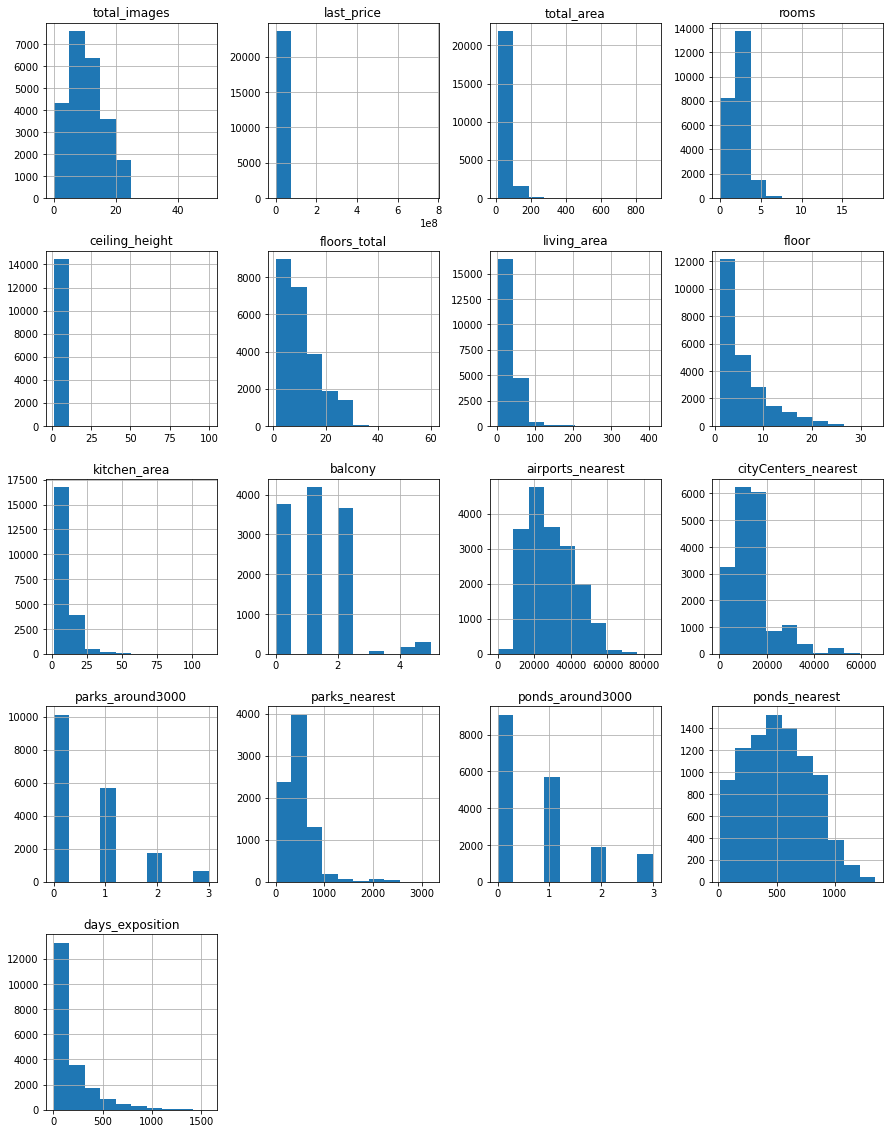

In [4]:
data.hist(figsize=(15, 20))

Изучив общую информацию из таблицы можно заметить большое количество пропусков в некоторых столбцах. Наибольшее количество пропусков в столбце **'is_apartment'**, содержащем информацию о том, является ли объект недвижимости аппартаментами. Много пропущенных значений содержат столбцы с данными о расстоянии до ближайших аэропорта/центра города/парка/пруда и количестве последних в радиусе 3 км: **'airports_nearest', 'cityCenters_nearest', 'parks_around3000', 'parks_nearest', 'ponds_around3000', 'ponds_nearest'**. Также следует проанализировать столбцы с важной информацией о квартирах, в которых содержится меньше пропусков: **'ceiling_height', 'living_area', 'floors_total', 'kitchen_area', 'balcony', 'locality_name', 'days_exposition'**.

Из общей статистики данных, полученной методом **_describe()_** мы видим подозрительно не вяжущиеся со здравым смыслом показатели, такие как высота потолков в 100 метров, кол-во комнат до 19, жилой площадью более 400 кв.метров и с 5 балконами. Данные показатели тоже следует проанализировать и рассмотреть более тщательно, чтобы принять решение, стоит ли от них избавляться.

<div class="alert alert-success">
<b>Комментарий ревьюера: ✅</b>

Классный и удобный способ визуализировать распределения сразу для всех столбцов 👍

</div>

### Предобработка данных

In [5]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Для нагладности, посмотрим на доли пропусков в столбцах в процентном соотношении.

In [6]:
missing_data = data.isnull().sum() / len(data) * 100
missing_data = missing_data[missing_data > 0]
missing_data.sort_values(ascending=False, inplace=True)
missing_data

is_apartment           88.290645
parks_nearest          65.909954
ponds_nearest          61.559559
balcony                48.605426
ceiling_height         38.799105
airports_nearest       23.384953
cityCenters_nearest    23.287902
parks_around3000       23.283683
ponds_around3000       23.283683
days_exposition        13.422507
kitchen_area            9.612220
living_area             8.029875
floors_total            0.362885
locality_name           0.206760
dtype: float64

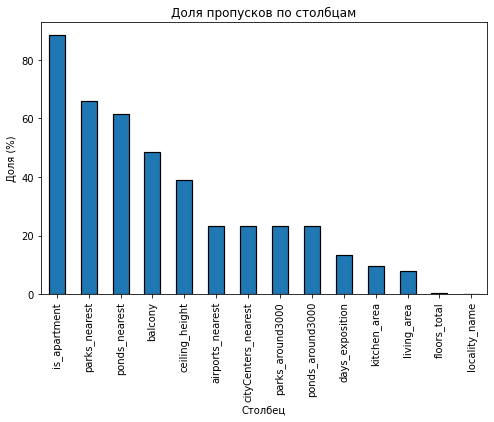

In [7]:
missing_data.plot(kind='bar', edgecolor='black', linewidth=1.2, figsize=(8,5))
plt.title('Доля пропусков по столбцам')
plt.xlabel('Столбец')
plt.ylabel('Доля (%)')
plt.show()

Практически одинаковый процент пропусков в столбцах, данные для которых были получены автоматически на основе картографических данных, говорит либо о сбое при получении даных, либо о проблеме в определении координат объекта. Данный вопрос нужно довести до ответственных за сбор данных специалистов.

<div class="alert alert-warning">
<b>Комментарий ревьюера: ❗️</b>

<s>Рекомендую также оценивать доли пропусков по столбцам, таким образом мы сразу сможем понять где больше всего пропусков в нашем датафрейме.

</div>

<div class="alert alert-info"> <b>Комментарий студента: ℹ️</b> Добавлены доли пропусков в процентах и визуализация в виде графика.</div>

<div class="alert alert-success">
<b>Комментарий ревьюера (2): ✅</b>

🔥🔥🔥    
    
    
</div>

#### Столбец 'is_apartment'

В столбце 'is_apartment' много пропущенных значений. Следует выяснить причину, почему так произошло. На данный момент не ясно, произошла ли ошибка при выгрузке, либо это ошибка пользователей при публикации объявлений.
Чтобы заполнить их, я проанализировала информацию в столбце 'studio', так как объект недвижимости не может быть одновременно и апартаментами и студией. Согласно полученным данным, не у всех студий указано количество комнат = 0, исправим это.
Нельзя с точностью утверждать, какие из квартир в датасете являются аппартаментами, а также эта информация не является критичной для проведения анализа, поэтому заменим пропущенные значения на 'False'

In [8]:
data.loc[data['rooms'] == 0, 'studio'] = True
data.loc[(data['studio'] == True) & (data['rooms'] > 0), 'rooms'] = 0

data['is_apartment'] = data['is_apartment'].fillna(False)

#### Столбцы 'total_area', 'living_area', 'kitchen_area', 'rooms'

В датасете присутствуют три столбца, данные в которых имеют прямую взаимосвязь - это общая площадь, жилая площадь и площадь кухни.
Начнём заполнение пропусков с анализа данных по общей площади объектов недвижимости. В столбце 'total_area' пропуски отсутствуют, поэтому будем отталкиваться в анализе от этих данных.

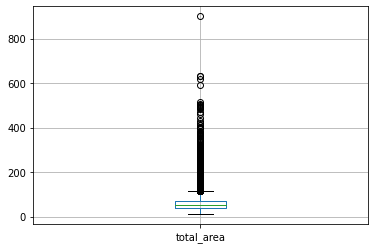

In [9]:
data.boxplot(column='total_area')
plt.show()

In [10]:
data['total_area'].describe()

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

Площадь квартиры, значительно превышающая 3 квартиль на диаграмме межквартильного размаха выглядят недостоверно. Признаем значения больше 200 кв.м. выбросом и очистим от них данные.

In [11]:
data = data.query('total_area <= 200.0')

Заполним данные о площади кухни исходя из данных о его общей и жилой площади. Таким же образом заполним данные о жилой площади.

In [12]:
data['kitchen_area'] = data.kitchen_area.where(data.kitchen_area.notna(), data.total_area - data.living_area)
data['living_area'] = data.living_area.where(data.living_area.notna(), data.total_area - data.kitchen_area)

data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9113
floors_total               85
living_area              1445
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             1445
balcony                 11402
locality_name              49
airports_nearest         5535
cityCenters_nearest      5515
parks_around3000         5514
parks_nearest           15541
ponds_around3000         5514
ponds_nearest           14521
days_exposition          3129
dtype: int64

Количество пропусков в столбцах 'living_area' и 'kitchen_area' совпадает. Думаю, логично было бы предположить, что это данные об одних и тех же объектах. Проверим гипотезу.

In [13]:
data.isnull().kitchen_area.equals(data.isnull().living_area)

True

Прежде чем принять решение о том, что делать с данными, проверим значения количества комнат у объектов, нет ли там выбросов.

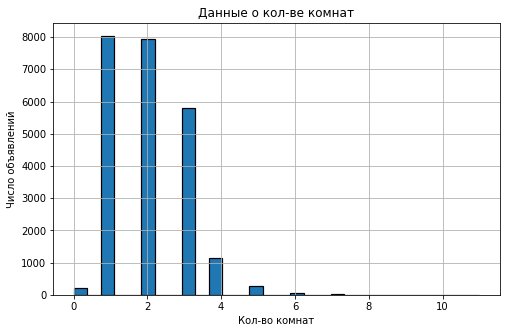

count    23472.000000
mean         2.034211
std          0.996469
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         11.000000
Name: rooms, dtype: float64

In [14]:
data.hist(column='rooms', edgecolor='black', linewidth=1.2, figsize=(8,5), bins=30)
plt.title("Данные о кол-ве комнат")
plt.xlabel("Кол-во комнат")
plt.ylabel("Число объявлений")
plt.show()


data['rooms'].describe()

<div class="alert alert-warning">
<b>Комментарий ревьюера: ❗️</b>

<s>Не забывай пожалуйста подписавать каждый график. Это важный момент всего проект, потому что так быстрее понять о чем идёт речь на графике.

</div>

<div class="alert alert-info"> <b>Комментарий студента: ℹ️</b> К графикам добавлены подписи, скорректирован размер и кол-во корзин.</div>

In [15]:
data['rooms'].value_counts()

1     8035
2     7940
3     5799
4     1140
5      265
0      207
6       62
7       20
8        2
11       2
Name: rooms, dtype: int64

Большое количество комнат не выглядит подозрительно, так как в продаже может находится бывшая коммунальная квартира. Это не удивительно для Петербурга, данные удалять не будем.

Не очень достоверно выглядит небольшое количество студий в выборке. Предположим, что некоторые пользователи указали в объявлении при продаже студии количество комнат равное 1, а также каким-то образом вычислили площадь кухни. Попробуем исправить это. Однокомнатные квартиры редко бывают меньше 27 кв.м, поэтому исправим значение кол-ва комнат и тип таких объектов в датасете.

In [16]:
data.loc[(data['total_area'] < 27.0) & (data['rooms'] == 1), 'rooms'] = 0
data.loc[(data['rooms'] == 0), 'studio'] = True

Чтобы заполнить недостающие значения в столбе 'living_area',можно использовать информацию о количестве комнат в квартире. Заполним площадь медианным значением в зависимости от кол-ва комнат. Таким же образом заполним и 'kitchen_area'. Чем больше комнат в квартире, тем больше вероятность, что её размеры будут отличаться. 

In [17]:
median_living_area_by_rooms = data.groupby('rooms')['living_area'].median()
data['living_area'] = data['living_area'].fillna(data['rooms'].map(median_living_area_by_rooms))

median_kitchen_area_by_rooms = data.groupby('rooms')['kitchen_area'].median()
data['kitchen_area'] = data['kitchen_area'].fillna(data['rooms'].map(median_kitchen_area_by_rooms))

In [18]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9113
floors_total               85
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                 11402
locality_name              49
airports_nearest         5535
cityCenters_nearest      5515
parks_around3000         5514
parks_nearest           15541
ponds_around3000         5514
ponds_nearest           14521
days_exposition          3129
dtype: int64

Для дальнейшей работы с данными нужно избавится от выбросов в столбцах 'living_area' и 'kitchen_area'. Составим графики и диаграммы размаха.

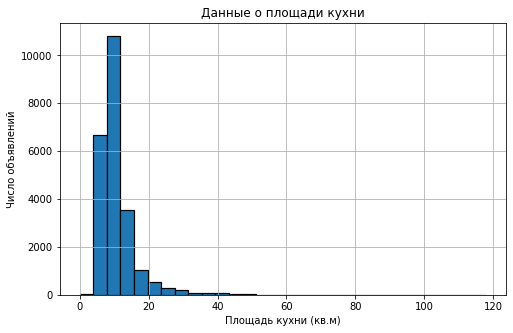

count    23472.000000
mean        10.570699
std          5.759077
min          0.000000
25%          7.200000
50%          9.300000
75%         11.900000
max        117.900000
Name: kitchen_area, dtype: float64

In [19]:
data.hist(column='kitchen_area', edgecolor='black', linewidth=1.2, figsize=(8,5), bins=30)
plt.title("Данные о площади кухни")
plt.xlabel("Площадь кухни (кв.м)")
plt.ylabel("Число объявлений")
plt.show()

data['kitchen_area'].describe()

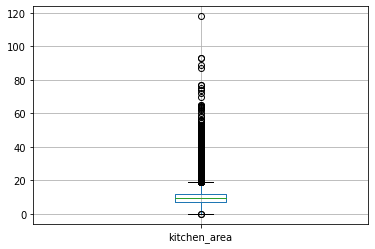

In [20]:
data.boxplot(column='kitchen_area')
plt.show()

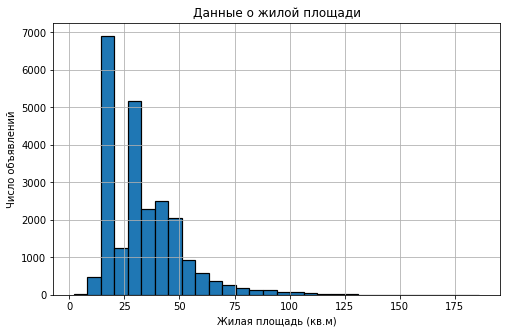

count    23472.000000
mean        33.502783
std         17.628911
min          2.000000
25%         18.500000
50%         30.200000
75%         42.500000
max        186.120000
Name: living_area, dtype: float64

In [21]:
data.hist(column='living_area', edgecolor='black', linewidth=1.2, figsize=(8,5), bins=30)
plt.title("Данные о жилой площади")
plt.xlabel("Жилая площадь (кв.м)")
plt.ylabel("Число объявлений")
plt.show()

data['living_area'].describe()

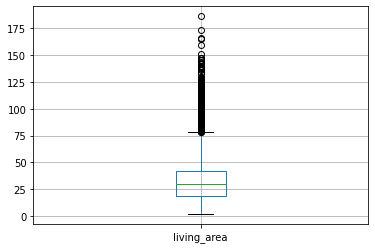

In [22]:
data.boxplot(column='living_area')
plt.show()

Посмотрим, как изменятся данные, если очистить их от объектов недвижимости, в которых площадь кухни превышает завышенный, но намного ближе к истине размер в 50 кв.м.

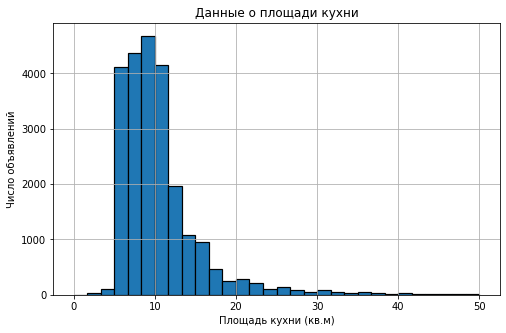

count    23429.000000
mean        10.472893
std          5.256110
min          0.000000
25%          7.200000
50%          9.300000
75%         11.800000
max         50.000000
Name: kitchen_area, dtype: float64

In [23]:
data = data.query('kitchen_area <= 50.0')

data.hist(column='kitchen_area', edgecolor='black', linewidth=1.2, figsize=(8,5), bins=30)
plt.title("Данные о площади кухни")
plt.xlabel("Площадь кухни (кв.м)")
plt.ylabel("Число объявлений")
plt.show()

data['kitchen_area'].describe()

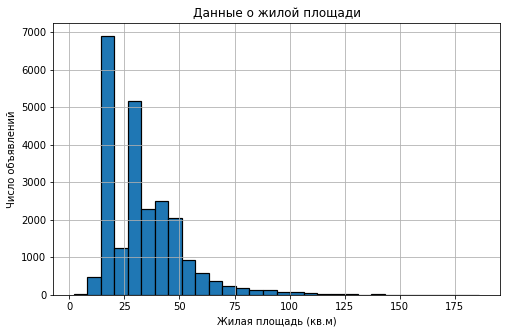

count    23429.000000
mean        33.454554
std         17.580089
min          2.000000
25%         18.500000
50%         30.200000
75%         42.400000
max        186.120000
Name: living_area, dtype: float64

In [24]:
data.hist(column='living_area', edgecolor='black', linewidth=1.2, figsize=(8,5), bins=30)
plt.title("Данные о жилой площади")
plt.xlabel("Жилая площадь (кв.м)")
plt.ylabel("Число объявлений")
plt.show()

data['living_area'].describe()

Теперь в данных нет явно выбивающихся показателей.

<div class="alert alert-success">
<b>Комментарий ревьюера: ✅</b>

Кстати для того чтобы подписать график мы можем использовать метод `plt.title()` и в конце кода применить `plt.show()`
</div>

#### Столбец 'balcony'

В столбце 'balcony' содержатся данные о количестве балконов. Множество пропущенных значений может говорить о том, что в квартирах, в которых отсутствуют балконы, пользователи не указали их число.
Заменим пропуски на '0'.

In [25]:
data['balcony'] = data['balcony'].fillna(0)

Для анализа значений построим гистограмму и посмотрим описательную характеристику.

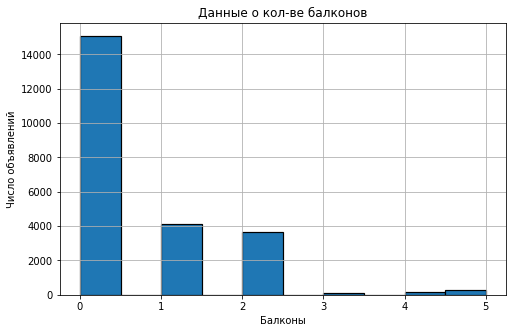

count    23429.000000
mean         0.593111
std          0.959886
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          5.000000
Name: balcony, dtype: float64

In [26]:
data.hist(column='balcony', edgecolor='black', linewidth=1.2, figsize=(8,5), bins=10)
plt.title("Данные о кол-ве балконов")
plt.xlabel("Балконы")
plt.ylabel("Число объявлений")
plt.show()

data['balcony'].describe()

In [27]:
data['balcony'].value_counts()

0.0    15078
1.0     4145
2.0     3648
5.0      301
4.0      179
3.0       78
Name: balcony, dtype: int64

Количество балконов больше двух выглядит неправдоподобно. Избавимся от выбросов, учитывая, что таких значений немного.

In [28]:
data = data.query('balcony <= 2')

Изменим тип данных в столбце на int, так как количество балконов - это всегда целое число.

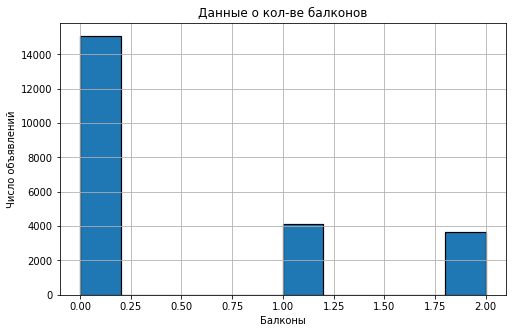

In [29]:
data['balcony'] = data['balcony'].astype('int')

data.hist(column='balcony', edgecolor='black', linewidth=1.2, figsize=(8,5), bins=10)
plt.title("Данные о кол-ве балконов")
plt.xlabel("Балконы")
plt.ylabel("Число объявлений")
plt.show()

#### Столбцы 'locality_name' и 'floors_total'

Данные в столбцах 'locality_name' и 'floors_total' не зависят от значений в других столбцах и логически их заполнить невозможно. Без названия населённого пункта и общего количества этажей в доме нельзя будет выполнить дальнейшие задания, и пропусков немного, поэтому удалим их.

In [30]:
data = data.dropna(subset=['locality_name', 'floors_total'])
data = data.reset_index(drop=True)

Приведем значения с общим количеством этажей в доме из типа float к int.

In [31]:
data['floors_total'] = data['floors_total'].astype('int')

Посмотрим значения в столбце 'locality_name' более подробно.

In [32]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

Внимательно проанализировав названия населенных пунктов в таблице, можно найти множество неявных дубликатов. Приведём их к одному общему знаменателю.

<div class="alert alert-warning">
<b>Комментарий ревьюера: ❗️</b>

<s>Лучше всего импортировать все необходимые библиотеки в самом начале проекта. 
    
Это общепринятый формат в программировании, ведь так проще понять какие пакеты будут использованы в нашей работе.
    
</div>

<div class="alert alert-info"> <b>Комментарий студента: ℹ️</b> Импорт библиотеки re удалён, код переписан через цикл for.</div>

In [33]:
#вручную поправим некоторые значения
data['locality_name'] = data['locality_name'].replace('посёлок Мурино', 'Мурино')
data['locality_name'] = data['locality_name'].replace('поселок Мурино', 'Мурино')
data['locality_name'] = data['locality_name'].replace('деревня Кудрово', 'Кудрово')
data['locality_name'] = data['locality_name'].replace('деревня Русско', 'село Русско-Высоцкое')
data['locality_name'] = data['locality_name'].replace('поселок Любань', 'Любань')

for s in ['поселок городского типа ', 'посёлок городского типа ','село ', 'деревня ', \
         'коттеджный посёлок ', 'коттеджный поселок ', 'посёлок при железнодорожной станции', 'посёлок станции ', \
         'поселок станции ', 'городской посёлок ', 'городской поселок ', 'посёлок ']:
    data['locality_name'] = data['locality_name'].str.replace(s,'поселок ')

data['locality_name'].unique()


array(['Санкт-Петербург', 'поселок Шушары', 'поселок Янино-1',
       'поселок Парголово', 'Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'Кудрово', 'Коммунар', 'Колпино',
       'поселок Красный Бор', 'Гатчина', 'поселок Фёдоровское', 'Выборг',
       'Кронштадт', 'Кировск', 'поселок Новое Девяткино',
       'поселок Металлострой', 'поселок Лебяжье', 'поселок Сиверский',
       'поселок Молодцово', 'поселок Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'поселок Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'поселок Куттузи', 'поселок Аннино',
       'поселок Ефимовский', 'поселок Плодовое', 'поселок Заклинье',
       'поселок Торковичи', 'поселок Первомайское', 'Красное Село',
       'поселок Понтонный', 'Сясьстрой', 'поселок Старая',
       'поселок Лесколово', 'поселок Новый Свет', 'Сланцы',
       'поселок Путилово', 'Ивангород', 'Шлиссельбург', 'Никольское',
       'Зеленогорск', 'Сосновый Бор',

<div class="alert alert-warning">
<b>Комментарий ревьюера: ❗️</b>

<s>Для однотипных расчетов мы всегда можем использовать цикл `for` и тем самым сделать код внутри проекта гораздо чище.   
</div>

<div class="alert alert-info"> <b>Комментарий студента: ℹ️</b> Переделала через цикл for.</div>

#### Столбец 'days_exposition'

Столбец 'days_exposition' содержит информацию о том, сколько дней было размещено объявление. Пропуски в этом столбце могут говорить о том, что объявление все еще размещено на сайте, поэтому не будем их удалять, а заменим на "0"

In [34]:
data['days_exposition'] = data['days_exposition'].fillna(0)

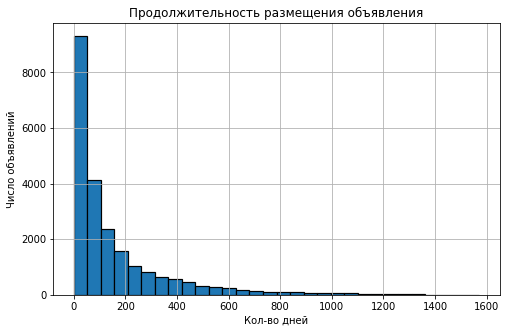

count    22739.000000
mean       155.552399
std        212.178331
min          0.000000
25%         23.000000
50%         73.000000
75%        197.000000
max       1572.000000
Name: days_exposition, dtype: float64

In [35]:
data.hist(column='days_exposition', edgecolor='black', linewidth=1.2, figsize=(8,5), bins=30)
plt.title("Продолжительность размещения объявления")
plt.xlabel("Кол-во дней")
plt.ylabel("Число объявлений")
plt.show()

data['days_exposition'].describe()

Несмотря на то, что в датасете присутствуют объекты недвижимости, по которым длительность размещения объявления превышает 2 года, в том чтобы удалять такие значения нет необходимости. Возможно, объявление просто не было закрыто на сайте по окончании сделки.
Приведем значения в столбце к целочисленному типу данных.

In [36]:
data['days_exposition'] = data['days_exposition'].astype('int')

#### Столбец 'ceiling_height'

Столбец 'ceiling_height' содержит количественные значения высоты потолков. Построим график, чтобы проанализировать значения в этом столбце. 

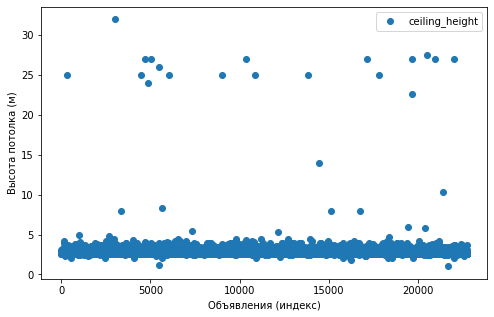

In [37]:
data.plot(y='ceiling_height', style='o', figsize=(8,5))
plt.xlabel('Объявления (индекс)')
plt.ylabel('Высота потолка (м)')
plt.show()

Выбивающиеся значения высоты потолков больше 20 метров это скорее всего, неверно указанные значения в 2 метра и более, исправим их.

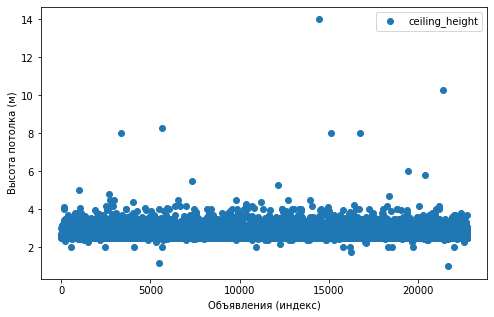

In [38]:
data['ceiling_height'] = data['ceiling_height'].where(data['ceiling_height'] < 20, data['ceiling_height'] / 10)

data.plot(y='ceiling_height', style='o', figsize=(8,5))
plt.xlabel('Объявления (индекс)')
plt.ylabel('Высота потолка (м)')
plt.show()

Высота потолков в центре Санкт-Петербурга может значительно отличаться от квартир более удаленных. Проверим эту гипотезу и посмотрим корреляцию.

In [39]:
data['ceiling_height'].corr(data['cityCenters_nearest'])

-0.3154666824396383

Корреляция слабая, поэтому можно заполнить пропуски в столбце 'ceiling_height' медианными значениями.

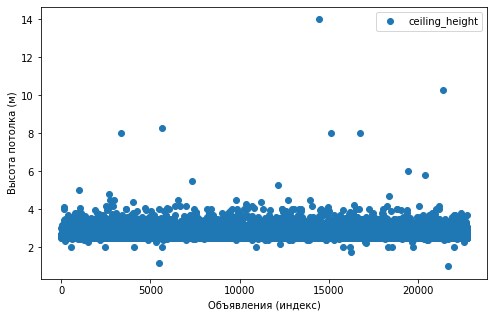

In [40]:
ceiling_avg = data['ceiling_height'].median()
data['ceiling_height'] = data['ceiling_height'].fillna(ceiling_avg)

data.plot(y='ceiling_height', style='o', figsize=(8,5))
plt.xlabel('Объявления (индекс)')
plt.ylabel('Высота потолка (м)')
plt.show()

На графике остались заметные выбивающиеся значения. Проверим характерные значения для этого столбца.

In [41]:
data['ceiling_height'].describe()

count    22739.000000
mean         2.692996
std          0.240414
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max         14.000000
Name: ceiling_height, dtype: float64

Третий квартиль Q3 находится на значении 2,7 метров. Учтем, что потолки в центре города могут быть очень высокими, но высота более 4 метров уже выглядит неправдаподобно. Исключим эти значения и значения высоты потолка менее 2 метров.

In [42]:
data = data.loc[(data["ceiling_height"] > 2.0) & (data["ceiling_height"] < 4.0)]

data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5379
cityCenters_nearest      5359
parks_around3000         5358
parks_nearest           15059
ponds_around3000         5358
ponds_nearest           14063
days_exposition             0
dtype: int64

<div class="alert alert-warning">
<b>Комментарий ревьюера: ❗️</b>

<s>Когда используешь множественную фильтрацию, рекомендую использовать метод `loc`. Он читается проще и работает быстрее.

</div>

<div class="alert alert-info"> <b>Комментарий студента: ℹ️</b> Переделала через метод loc.</div>

Для проведения дальнейшего анализа нам потребуются данные о расстоянии до центра города, ближайшего аэропорта и парка. В связи с тем, что нет возможности заполнить данные показатели достоверными значениями, а кол-во пропусков большое, будем работать с теми данными, которые нам доступны.
 Кол-во прудов и парков в радиусе 3 км, а также расстояние до ближайшего водоёма в исследовательском анализе нам не пригодится. Поэтому столбцы 'parks_around3000', 'ponds_around3000' и 'ponds_nearest' не трогаем и ничего в них не удаляем.

#### Преобразование типа данных

Проверим, какие типы данных мы получили в результате заполнения пропусков и приведем к нужному.

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22655 entries, 0 to 22738
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          22655 non-null  int64  
 1   last_price            22655 non-null  float64
 2   total_area            22655 non-null  float64
 3   first_day_exposition  22655 non-null  object 
 4   rooms                 22655 non-null  int64  
 5   ceiling_height        22655 non-null  float64
 6   floors_total          22655 non-null  int64  
 7   living_area           22655 non-null  float64
 8   floor                 22655 non-null  int64  
 9   is_apartment          22655 non-null  bool   
 10  studio                22655 non-null  bool   
 11  open_plan             22655 non-null  bool   
 12  kitchen_area          22655 non-null  float64
 13  balcony               22655 non-null  int64  
 14  locality_name         22655 non-null  object 
 15  airports_nearest   

In [44]:
#цена на момент снятия публикации указана в целых рублях
data['last_price'] = data['last_price'].astype('int')


#дату публикации нужно перевести в тип Date Time вместо object
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 22655 entries, 0 to 22738
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          22655 non-null  int64         
 1   last_price            22655 non-null  int64         
 2   total_area            22655 non-null  float64       
 3   first_day_exposition  22655 non-null  datetime64[ns]
 4   rooms                 22655 non-null  int64         
 5   ceiling_height        22655 non-null  float64       
 6   floors_total          22655 non-null  int64         
 7   living_area           22655 non-null  float64       
 8   floor                 22655 non-null  int64         
 9   is_apartment          22655 non-null  bool          
 10  studio                22655 non-null  bool          
 11  open_plan             22655 non-null  bool          
 12  kitchen_area          22655 non-null  float64       
 13  balcony         

### Посчитайте и добавьте в таблицу новые столбцы

#### Цена одного квадратного метра

Добавим в таблицу новый столбец **'price_per_sqm'** с информацией о цене за 1 кв.м. для каждого объекта недвижимости.

In [45]:
data['price_per_sqm'] = data['last_price'] / data['total_area']

##для удобства использования переведем цену за кв.метр в тысячи с 2-мя знаками после запятой
data['price_per_sqm'] = (data['price_per_sqm'] / 1000).round(2)

#для удобства использования переведем цену квартир в тысячи с 2-мя знаками после запятой
data['last_price'] = (data['last_price'] / 1000).round(2)

#### Определение дня недели, месяца и года публикации объявления

При помощи методов объекта ditetime, определим день, месяц и год публикации объявления и выделим в отдельные столбцы.

In [46]:
data['ad_weekday'] = data['first_day_exposition'].dt.weekday
data['ad_month'] = data['first_day_exposition'].dt.month
data['ad_year'] = data['first_day_exposition'].dt.year

#### Определение типа этажа квартиры

Напишем функцию, которая будет принимать в качестве параметра датасет, добавит в него новый столбец и будет записывать значение категории этажа, в зависимости от его расположения на первом, последнем или другом этаже.

In [47]:
def categorize_floors(data):
    data['floor_category'] = 'другой'
    data.loc[data['floor'] == 1, 'floor_category'] = 'первый'
    data.loc[data['floor'] == data['floors_total'], 'floor_category'] = 'последний'
    return data

data = categorize_floors(data)

#### Перевод расстояния до центра города  в км

Столбец **'cityCenters_nearest'** содержит информацию о расстоянии до центра города в метрах, переведем эти данные в километры.

In [48]:
data['city_center_km'] = data['cityCenters_nearest']/1000
data['city_center_km'].describe()

count    17296.000000
mean        14.297498
std          8.602977
min          0.181000
25%          9.439000
50%         13.166500
75%         16.333000
max         65.968000
Name: city_center_km, dtype: float64

Количество значений меньше, чем объектов недвижимости из-за пропусков в столбце **'cityCenters_nearest'**. Исправим это, заполнив пропуски медианными значениями по городам и далее медианой по всему датасету по населенным пунктам, информация о которых отсутствует.

In [49]:
#заполняем медианой значение расстояния в км по известным городам
median_by_city = data.groupby('locality_name')['city_center_km'].median().to_dict()
data['city_center_km'].fillna(data['locality_name'].map(median_by_city), inplace=True)

In [50]:
#заполняем оставшиеся города медианой по всем значениям столбца
data['city_center_km'].fillna(data['city_center_km'].median(), inplace=True)

#приведем к целому числу для удобства
data['city_center_km'] = data['city_center_km'].astype('int')

In [51]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_sqm,ad_weekday,ad_month,ad_year,floor_category,city_center_km
0,20,13000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,482.0,2.0,755.0,0,120.37,3,3,2019,другой,16
1,7,3350.0,40.4,2018-12-04,1,2.65,11,18.6,1,False,...,NaN,0.0,NaN,81,82.92,1,12,2018,первый,18
2,10,5196.0,56.0,2015-08-20,2,2.65,5,34.3,4,False,...,90.0,2.0,574.0,558,92.79,3,8,2015,другой,13
3,0,64900.0,159.0,2015-07-24,3,2.65,14,45.0,9,False,...,84.0,3.0,234.0,424,408.18,4,7,2015,другой,6
4,2,10000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,112.0,1.0,48.0,121,100.00,1,6,2018,другой,8


Новые столбцы добавились в таблицу и выглядят корректно.

<div class="alert alert-success">
<b>Комментарий ревьюера: ✅</b>

Мы достаточно детально обработали наши данные и добавили все необходимые значения в нашу выборку. Давай теперь проведём анализ.
    
</div>

### Проведите исследовательский анализ данных

#### Изучите параметры объектов. Постройте гистограммы. Опишите все ваши наблюдения по параметрам

Рассмотрим распределение **общей площади** квартир в выборке.

count    22655.000000
mean        57.417080
std         25.938444
min         12.000000
25%         39.900000
50%         51.000000
75%         67.700000
max        200.000000
Name: total_area, dtype: float64

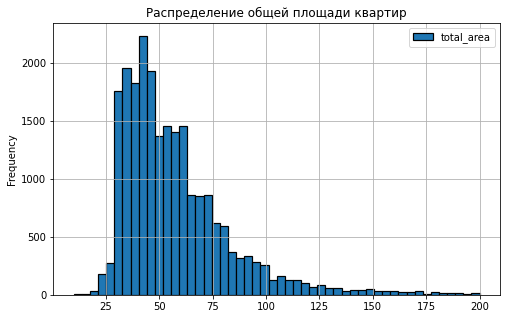

In [52]:
data.plot(title = 'Распределение общей площади квартир', y = 'total_area', kind = 'hist', bins = 50, \
          grid=True, edgecolor='black', linewidth=1.2, range = (10,200), figsize=(8,5))
data['total_area'].describe()

График похож на нормальное распределение, скошенное влево. Типичные значения расположены в середине "колокола", белее редкие - по краям.

Рассмотрим распределение **жилой площади** квартир в выборке.

<div class="alert alert-warning">
<b>Комментарий ревьюера: ❗️</b>

<s>Если код не помещается в одну строку, рекомендую переносить его на следующую подстроку если мы внутри одного метода пишем код или с помощью обратного слеша, если применяем несколько методов. Так код читается быстрее и понятнее.
    
</div>

<div class="alert alert-info"> <b>Комментарий студента: ℹ️</b> Исправлены переносы во всей работе.</div>

count    22655.000000
mean        33.078089
std         17.346381
min          2.000000
25%         18.300000
50%         30.000000
75%         42.000000
max        173.000000
Name: living_area, dtype: float64

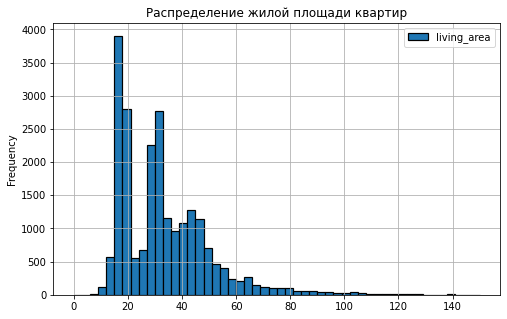

In [53]:
data.plot(title = 'Распределение жилой площади квартир', y = 'living_area', kind = 'hist', bins = 50, grid=True, \
          edgecolor='black', linewidth=1.2,  range = (0,150), figsize=(8,5))
data['living_area'].describe()

Распределение нормальное с двумя пиками. Выборка достаточно неоднородная, в ней присутствуют и квартиры-студии и обычные квартиры, также нельзя достоверно сказать, что все жилые площади указаны пользователями достоверно, а не взяты из собственного глазомера.

<div class="alert alert-success">
<b>Комментарий ревьюера: ✅</b>

Также мы можем увеличить сам график, чтобы его было удобнее изучать с помощью метода `plt.figure(figsize=(10,7))` или если используешь методы библиотеки `pandas`, в основном всегда есть атрибут `figsize=(10,7)`, который также поможет настроить ширину и высоту графика.
    
</div>

Рассмотрим распределение **площади кухни** в квартирах из выборки.

count    22655.000000
mean        10.390518
std          5.176653
min          0.000000
25%          7.100000
50%          9.200000
75%         11.600000
max         50.000000
Name: kitchen_area, dtype: float64

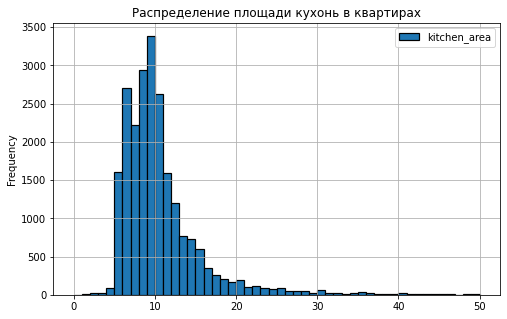

In [54]:
data.plot(title = 'Распределение площади кухонь в квартирах', y = 'kitchen_area', kind = 'hist', bins = 50, grid=True, \
          edgecolor='black', linewidth=1.2, range = (0,50), figsize=(8,5))
data['kitchen_area'].describe()

График распределения нормальный, скошенный влево.

Рассмотрим распределение **цены квартир** из выборки.

count     22655.000000
mean       5887.661497
std        5947.039250
min          12.190000
25%        3400.000000
50%        4550.000000
75%        6550.000000
max      330000.000000
Name: last_price, dtype: float64

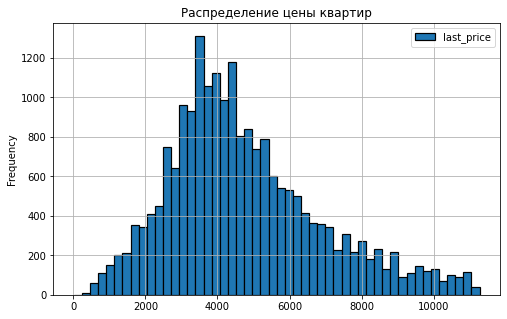

In [55]:
q1 = data['last_price'].quantile(0.25)
q3 = data['last_price'].quantile(0.75)
iqr = q3 - q1

# выбираем данные в диапазоне от (q1 - 1.5 * iqr) до (q3 + 1.5 * iqr)
data_q = data.loc[(data['last_price'] > q1 - 1.5 * iqr) & (data['last_price'] < q3 + 1.5 * iqr)]

data_q.plot(title = 'Распределение цены квартир', y = 'last_price', kind = 'hist', bins = 50, grid=True, \
            edgecolor='black', linewidth=1.2, figsize=(8,5))
data['last_price'].describe()

График распределения нормальный, скошенный влево.

<div class="alert alert-success">
<b>Комментарий ревьюера: ✅</b>

Чтобы нам в ручную не задавать параметр `range` мы можем посмотреть в открытом доступе  – как считать интерквартильный размах для нижнего и верхнего уровня нормального распределения.
    
https://stackoverflow.com/questions/50461349/how-to-remove-outlier-from-dataframe-using-iqr
    
</div>

<div class="alert alert-info"> <b>Комментарий студента: ℹ️</b> Посчитала размах для этого параметра, надеюсь не накосячила. Другие не исправляла, думаю это больше подошло бы при создании функции.</div>

<div class="alert alert-success">
<b>Комментарий ревьюера (2): ✅</b>

В целом да, это отлично подойдет при создании функции.   
    
</div>

Рассмотрим распределение **количества комнат** в выборке.

count    22655.000000
mean         2.006047
std          1.006691
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         11.000000
Name: rooms, dtype: float64

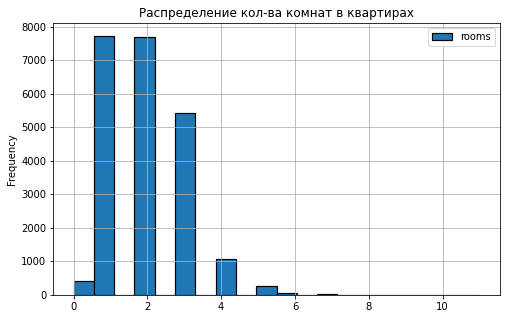

In [56]:
data.plot(title = 'Распределение кол-ва комнат в квартирах', y = 'rooms', kind = 'hist', grid=True, \
          edgecolor='black', linewidth=1.2, bins=20, figsize=(8,5))
data['rooms'].describe()

Стандартное отклонение (std) - это мера разброса данных вокруг среднего значения. Чем больше стандартное отклонение, тем больше разброс данных. В данном случае std равен 1.006691, что означает что данные разбросаны в диапазоне от 0 до 2.

<div class="alert alert-success">
<b>Комментарий ревьюера: ✅</b>

Обрати внимание, что наши действия повторяются с точки зрения построения графиков.
    
Это говорит о том, что мы можем создать функцию, которая будет выполнять все действия за нас.
    
Тем самым мы сможем оптимизировать свой код и проект целиком.
    
</div>

<div class="alert alert-info"> <b>Комментарий студента: ℹ️</b> Интересная идея, но к сожалению не хватает времени на её реализацию. Если это не обязательное требование, то буду иметь ввиду в следующий раз. Спасибо!</div>

<div class="alert alert-success">
<b>Комментарий ревьюера (2): ✅</b>

Да, это больше информация для дальнейшего развития.    
    
    
</div>

Рассмотрим распределение **высоты потолков** в выборке.

count    22655.000000
mean         2.687320
std          0.191758
min          2.200000
25%          2.600000
50%          2.650000
75%          2.700000
max          3.980000
Name: ceiling_height, dtype: float64

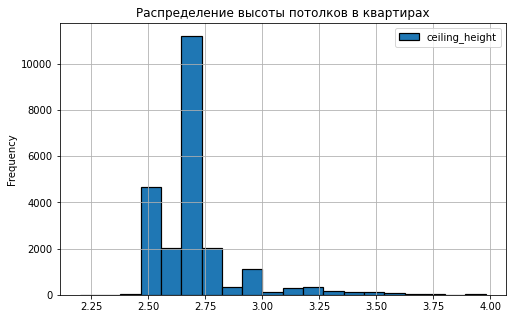

In [57]:
data.plot(title = 'Распределение высоты потолков в квартирах', y = 'ceiling_height', kind = 'hist', \
          grid=True, edgecolor='black', linewidth=1.2, bins=20, figsize=(8,5))
data['ceiling_height'].describe()

Распределение нормальное, стандартное отклонение небольшое, это означает, что значения близки к среднему значению и нет большой разницы между значениями.

Рассмотрим распределение **высоты этажа** на которых расположены квартиры.

count    22655.000000
mean         5.851777
std          4.860880
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

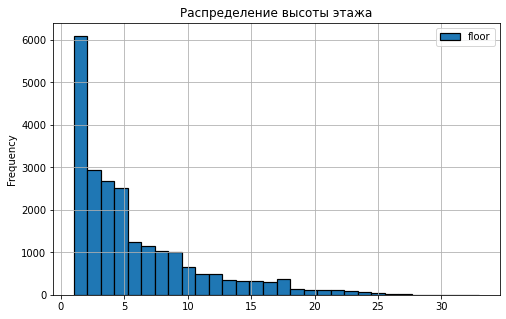

In [58]:
data.plot(title = 'Распределение высоты этажа', y = 'floor', kind = 'hist', grid=True, \
          edgecolor='black', linewidth=1.2, bins=30, figsize=(8,5))
data['floor'].describe()

Рассмотрим распределение **типа этажа** на котором расположены квартиры.

<div class="alert alert-success">
<b>Комментарий ревьюера: ✅</b>

Если вдруг тебе понравилась тема визуализации, рекомендую посмотреть на библиотеку `seaborn`.   
</div>

другой       16641
последний     3181
первый        2833
Name: floor_category, dtype: int64

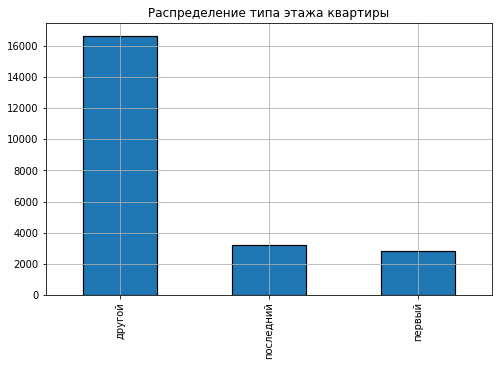

In [59]:
floor_counts = data['floor_category'].value_counts()
floor_counts.plot.bar(title = 'Распределение типа этажа квартиры', grid=True, edgecolor='black', \
                      linewidth=1.2, figsize=(8,5))

data['floor_category'].value_counts()

Рассмотрим распределение **общего количества этажей в доме**.

count    22655.000000
mean        10.687530
std          6.601775
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

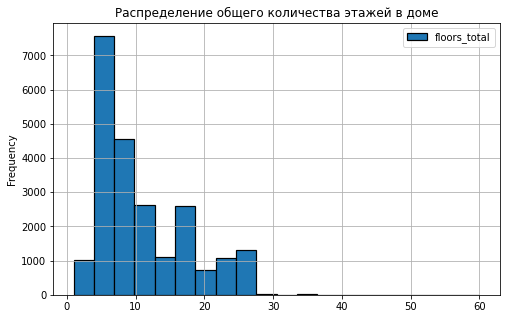

In [60]:
data.plot(title = 'Распределение общего количества этажей в доме', y = 'floors_total', kind = 'hist', \
          grid=True, edgecolor='black', linewidth=1.2, bins=20, figsize=(8,5))
data['floors_total'].describe()

Рассмотрим распределение **расстояния до центра города в метрах**.

count    17296.000000
mean     14297.498265
std       8602.976898
min        181.000000
25%       9439.000000
50%      13166.500000
75%      16333.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64

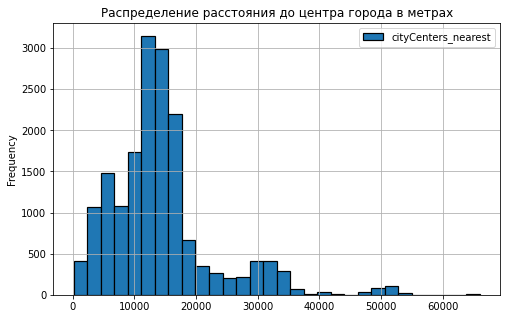

In [61]:
data.plot(title = 'Распределение расстояния до центра города в метрах', y = 'cityCenters_nearest', \
          kind = 'hist', grid=True, edgecolor='black', linewidth=1.2, bins=30, figsize=(8,5))
data['cityCenters_nearest'].describe()

Рассмотрим распределение **расстояния до ближайшего аэропорта**.

count    17276.000000
mean     28794.524080
std      12696.716107
min          0.000000
25%      18474.000000
50%      26770.000000
75%      37313.000000
max      84869.000000
Name: airports_nearest, dtype: float64

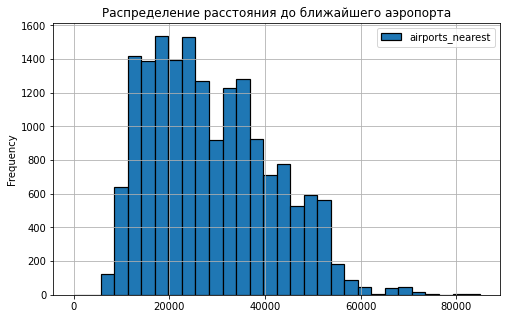

In [62]:
data.plot(title = 'Распределение расстояния до ближайшего аэропорта', y = 'airports_nearest', \
          kind = 'hist', grid=True, edgecolor='black', linewidth=1.2, bins=30, figsize=(8,5))
data['airports_nearest'].describe()

Рассмотрим распределение **расстояния до ближайшего парка**.

count    7596.000000
mean      491.320037
std       342.546144
min         1.000000
25%       288.000000
50%       455.000000
75%       613.000000
max      3190.000000
Name: parks_nearest, dtype: float64

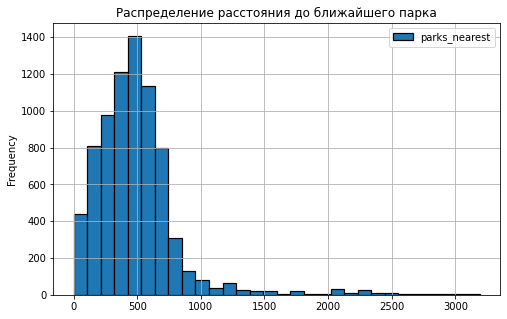

In [63]:
data.plot(title = 'Распределение расстояния до ближайшего парка', y = 'parks_nearest', kind = 'hist', \
          grid=True, edgecolor='black', linewidth=1.2, bins=30, figsize=(8,5))
data['parks_nearest'].describe()

Рассмотрим распределение **дня и месяца публикации объявления**.

3    4100
1    4017
4    3835
2    3799
0    3451
5    1838
6    1615
Name: ad_weekday, dtype: int64

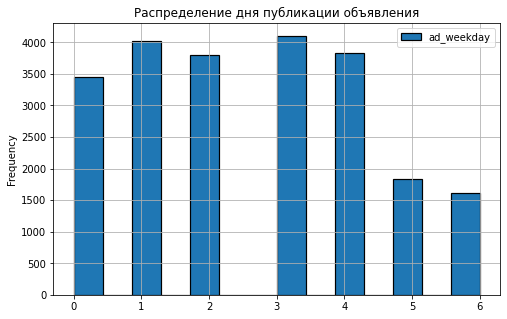

In [64]:
data.plot(title = 'Распределение дня публикации объявления', y = 'ad_weekday', kind = 'hist', \
          grid=True, edgecolor='black', linewidth=1.2, bins=14, figsize=(8,5))
data['ad_weekday'].value_counts()

2     2540
3     2484
11    2255
4     2252
10    2033
9     1897
6     1687
8     1671
7     1620
12    1579
1     1416
5     1221
Name: ad_month, dtype: int64

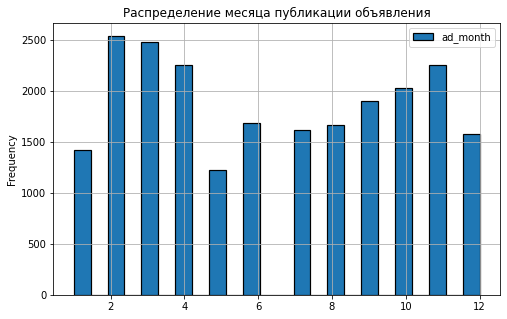

In [65]:
data.plot(title = 'Распределение месяца публикации объявления', y = 'ad_month', kind = 'hist', \
          grid=True, edgecolor='black', linewidth=1.2, bins=24, figsize=(8,5))
data['ad_month'].value_counts()

**Вывод**

Средняя площадь квартир в выборке составляет около 57 кв.м., присутствуют как и большие квартиры площадью до 200 квадратов, так и маленькие студии площадью до 12 кв.м.

Распределение жилой площади квартир неоднородное, средняя жилая площадь - около 30 кв. метров, но есть и большое кол-во квартир с жилой площадью менее 30 квадратов.

Кухни в среднем небольшого размера и не превышают 10-11 кв.метров.

Средняя стоимость квартир в выборке составляет 5,8 млн. рублей, при этом стоимость 3/4 из всей выборки не превышает 6,5 млн. рублей. Однако представлены также экземпляры стоимостью 10-30 млн. и приобретение около 1/4 квартир будет стоить меньше 3,4 млн. рублей. Рынок достаточно разнороден, можно найти подходящий вариант на любой кошелёк.

Около половины квартир в выборке - это студии, одно - и двух-комнатные квартиры. При этом доля 1 и 2 комнатных приблизительно одинакова. Остальные квартиры - это трешки и еще более многокомнатные квартиры.

Высота потолков в квартирах колеблется между 2.2 и 2.7 метрами. присутствуют экземпляры с очень высокими потолками почти в 4 метра. Такие значения тоже реальны для некоторых помещений, поэтому мы их не исключаем.

Средняя высота этажа расположения квартир - 5 этаж, а наибольшее количество значений лежит в диапазоне +- 5 этажей от среднего.

Кол-во квартир, расположенных на первом и последнем этажах в выборке примерно одинаково и составляет около 3 тыс. объявлений, остальные 16,6 тыс. объектов в объявлениях - квартиры на других этажах. 

Среднее кол-во этажей в домах, в которые продаются квартиры из выборки - 10 этажей. Распределение колеблется в диапазоне +- 6 этажей.

Наибольшее кол-во объявлений о продаже квартир, расположенных в 10-20 км от центра города. Это окраины Петербурга, конечные станции веток метро в районах - Фрунзенский, Приморский, Невский. Второй небольшой пик на графике показывает увеличение кол-ва квартир на продажу в 30 км от центра города, что может относится к Петродворцовому (Петергоф, Стрельна) и Красносельскому районам, также это Гатчина и Пушкин в тихом пригороде СПб.

Аэропорт Пулково-1 в Петербурге и области единственный, он находится в 15 км от центра Санкт-Петербурга в Московском районе. Средняя удаленность квартир в выборке от аэропорта - 28 км, что может говорить и о расположении квартир в противоположных от центра районах, так и расположении квартир в Лен.области.

Согласно официальным данным, в одном только Петербурге можно насчитать 166 садов, 68 парков и 730 скверов. Поэтому средняя удаленность продаваемой квартиры от парка в 500 метров выглядит очень убедительно. Учитывая, что в области зелёных зон гораздо больше.

Можно заметить прямую взаимосвязь между кол-вом публикаций и днем недели, в который пользователи их размещают. В выходные активность снижается и начинает нарастать с наступлением рабочих дней. Самые активные дни недели - это вторник и четверг.

Месяц размещения публикации тоже имеет важную роль. Самые большие пики в размещении объявлений - это ранняя весна и поздняя осень. Активность снижается с наступлением лета и новогодних праздников. Пики предложений можно наблюдать с февраля по апрель и в октябре-ноябре.

<div class="alert alert-success">
<b>Комментарий ревьюера: ✅</b>

Прекрасные промежуточные выводы 👍
    
Уже на этом этапе проекта чувствуется вся глубизна проработки задаче.
    
</div>

#### Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней было размещено каждое объявление.

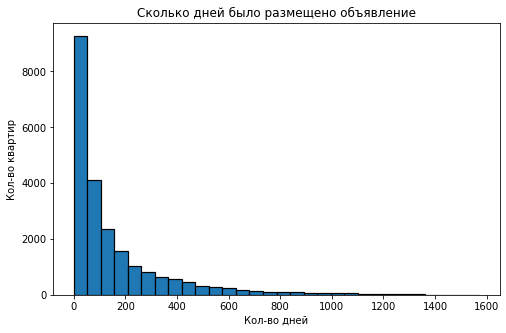

Среднее: 155.49022290885014
Медиана: 73.0


count    22655.000000
mean       155.490223
std        212.128850
min          0.000000
25%         23.000000
50%         73.000000
75%        196.000000
max       1572.000000
Name: days_exposition, dtype: float64

In [66]:
data['days_exposition'].hist(bins=30, grid=False, edgecolor='black', linewidth=1.2, figsize=(8,5))
plt.title('Сколько дней было размещено объявление')
plt.xlabel('Кол-во дней')
plt.ylabel('Кол-во квартир')
plt.show()
print('Среднее:', data['days_exposition'].mean())
print('Медиана:', data['days_exposition'].median())
data['days_exposition'].describe()

**Вывод**

Исходя из того, что выборка очень разнообразна по кол-ву дней, в которые была совершена сделка и закрыто объявление на сайте, можно сказать, что продажа больше года не выглядит достоверной, скорее всего тут имеет значение человеческий фактор и люди не всегда закрывают объявление на сайте после совершения сделки. Значение медианы составило 73 дня, что говорит о том, что приблизительно половина сделок совершается по истечении этого срока. 

Быстрой можно назвать сделку, которая закрывается в течение 23 дней и менее, необычно долгие - это продажи, занимающие 196 дней и более.

#### Какие факторы больше всего влияют на общую (полную) стоимость объекта?

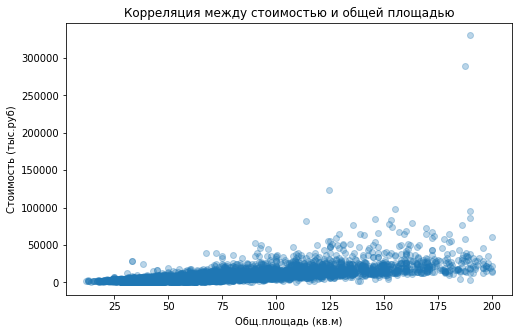

0.6575616655951189

In [67]:
#построим диаграмму рассеяния для поиска взаимосвязи
fig = plt.figure(figsize=(8, 5))
plt.scatter(data['total_area'], data['last_price'], alpha=0.3)
plt.xlabel('Общ.площадь (кв.м)')
plt.ylabel('Стоимость (тыс.руб)')
plt.title('Корреляция между стоимостью и общей площадью')
plt.show()

#взглянем на коэффицент корреляции Пирсона, чтобы подтвердить наблюдения
data['total_area'].corr(data['last_price'])

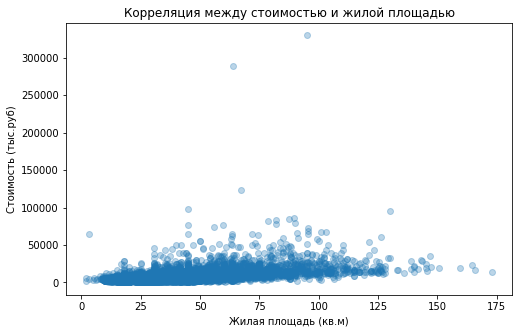

0.5331548697731591

In [68]:
fig = plt.figure(figsize=(8, 5))
plt.scatter(data['living_area'], data['last_price'], alpha=0.3)
plt.xlabel('Жилая площадь (кв.м)')
plt.ylabel('Стоимость (тыс.руб)')
plt.title('Корреляция между стоимостью и жилой площадью')
plt.show()
data['living_area'].corr(data['last_price'])

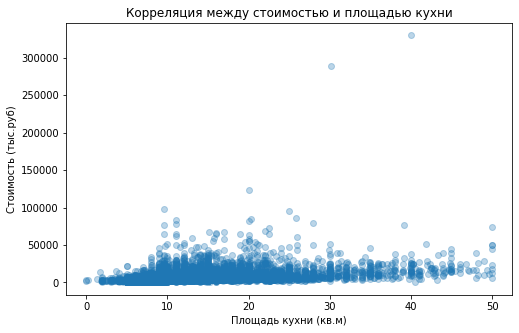

0.4448077583774484

In [69]:
fig = plt.figure(figsize=(8, 5))
plt.scatter(data['kitchen_area'], data['last_price'], alpha=0.3)
plt.xlabel('Площадь кухни (кв.м)')
plt.ylabel('Стоимость (тыс.руб)')
plt.title('Корреляция между стоимостью и площадью кухни')
plt.show()
data['kitchen_area'].corr(data['last_price'])

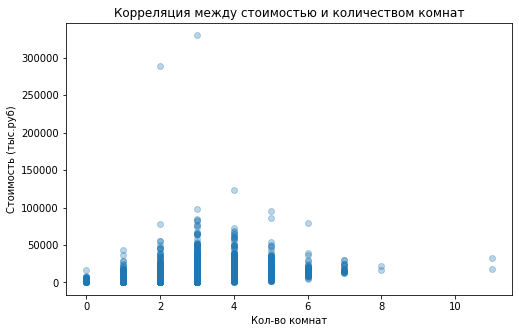

0.3835235392346818

In [70]:
fig = plt.figure(figsize=(8, 5))
plt.scatter(data['rooms'], data['last_price'], alpha=0.3)
plt.xlabel('Кол-во комнат')
plt.ylabel('Стоимость (тыс.руб)')
plt.title('Корреляция между стоимостью и количеством комнат')
plt.show()
data['rooms'].corr(data['last_price'])

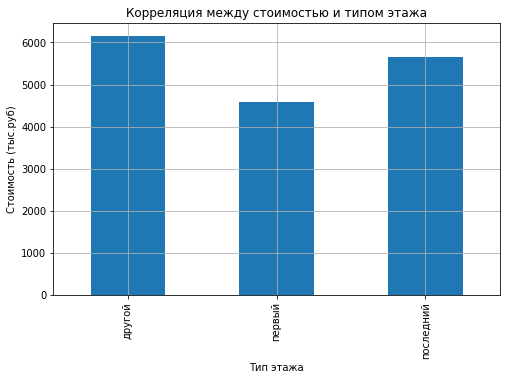

In [71]:
#группируем данные по этажам и посчитаем среднее значение для каждого типа
floor_type_cost = data.groupby('floor_category')['last_price'].mean()

#построим график засимостей типа этажа от стоимости квартиры
fig = plt.figure(figsize=(8, 5))
floor_type_cost.plot(kind='bar', grid=True, title='Корреляция между стоимостью и типом этажа')
plt.xlabel('Тип этажа')
plt.ylabel('Стоимость (тыс.руб)')
plt.show()

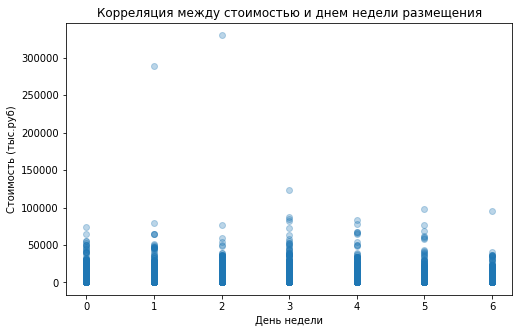

-0.014320907229804409

In [72]:
fig = plt.figure(figsize=(8, 5))
plt.scatter(data['ad_weekday'], data['last_price'], alpha=0.3)
plt.xlabel('День недели')
plt.ylabel('Стоимость (тыс.руб)')
plt.title('Корреляция между стоимостью и днем недели размещения')
plt.show()
data['ad_weekday'].corr(data['last_price'])

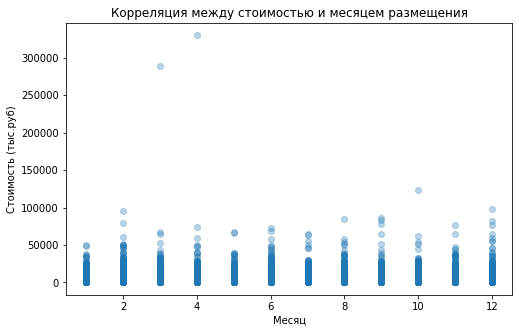

0.0018507015404973148

In [73]:
fig = plt.figure(figsize=(8, 5))
plt.scatter(data['ad_month'], data['last_price'], alpha=0.3)
plt.xlabel('Месяц')
plt.ylabel('Стоимость (тыс.руб)')
plt.title('Корреляция между стоимостью и месяцем размещения')
plt.show()
data['ad_month'].corr(data['last_price'])

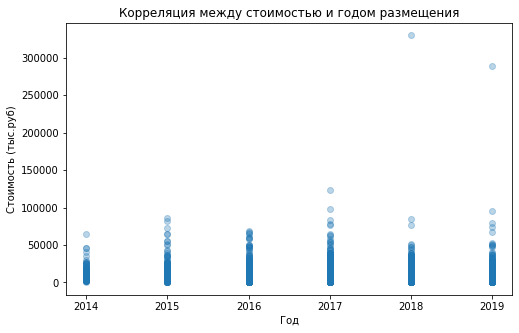

-0.03586929803984287

In [74]:
fig = plt.figure(figsize=(8, 5))
plt.scatter(data['ad_year'], data['last_price'], alpha=0.3)
plt.xlabel('Год')
plt.ylabel('Стоимость (тыс.руб)')
plt.title('Корреляция между стоимостью и годом размещения')
plt.show()
data['ad_year'].corr(data['last_price'])

**Вывод**

Больше всего на стоимость квартиры в представленной выборке влияют следующие факторы в порядке убывания:
- общая площадь;
- жилая площадь;
- площадь кухни;
- количество комнат;
- год публикации объявления.

Сильнее всего зависимость между ценой квартиры и общей площадью, этот показатель имеет большее влияние, чем размер жилой площади и площади кухни. Чем больше квартира, тем выше цена на неё.

Можно также отследить сильную зависимость стоимости от кол-ва комнат. Причем, стоимость растет, пока не достигает 3-х комнат. 4-х комнатные и более квартиры стоят дешевле, что может означать снижение их общей площади и то, что комнаты небольшого размера.

Зависимость между типом этажа, на котором размещена квартира есть, но нельзя рассчитать насколько она большая. Из полученного графика можно только сказать, что первые и последние этажи оцениваются ниже в среднем по рынку.

День и месяц размещения не имеют практически никакого влияния на цену объекта. Год коррелируется со стоимостью, но зависимость не очень высока, что может говорить о небольших колебаниях на рынке, но явных бумов и провалов в 2014-2019 годах не было. 

<div class="alert alert-success">
<b>Комментарий ревьюера: ✅</b>
    
Хорошие и логичные комментарии. Очень важно строить график корреляции между переменными, ведь может произойти такая ситуация, что расчет у нас очень сильный а на графике абсолютно другая картина.
    
---

В том числе можно было построить матрицу корреляции между нужными нам переменными.
    
И визуализировать её с помощью метода `heatmap` из библиотеки `seaborn`.
    
</div>

#### Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра.

Город с наибольшей ст-тью за кв.метр - Санкт-Петербург
Город с наименьшей ст-тью за кв.метр - Выборг


<AxesSubplot:title={'center':'Топ-10 городов с наибольшей стоимостью кв.м'}, xlabel='Город'>

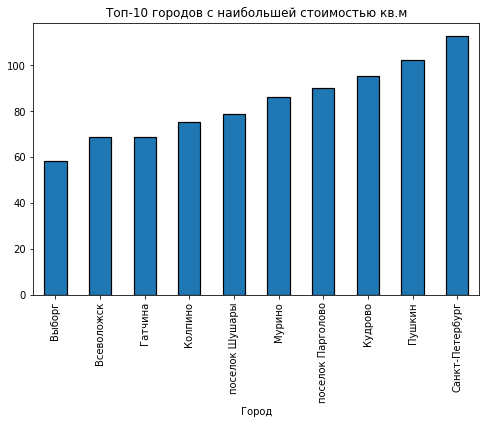

In [75]:
# группируем данные по городам
by_city = data.groupby('locality_name')

# выбираем топ-10 городов с наибольшим количеством объявлений
top_cities = by_city['locality_name'].size().nlargest(10)

# считаем среднюю центу за кв.метр для каждого из этих городов
avg_price_per_m2 = data.query('locality_name in @top_cities.index').groupby('locality_name')['price_per_sqm'].mean()

# находим наибольшее и наименьшее значение
min_city = avg_price_per_m2.idxmin()
max_city = avg_price_per_m2.idxmax()

print(f"Город с наибольшей ст-тью за кв.метр - {max_city}")
print(f"Город с наименьшей ст-тью за кв.метр - {min_city}")

# строим график по нарастающим значениям
avg_price_per_m2 = avg_price_per_m2.sort_values()
fig = plt.figure(figsize=(8, 5))
avg_price_per_m2.plot(title = 'Топ-10 городов с наибольшей стоимостью кв.м', xlabel='Город', kind='bar', edgecolor='black', \
                      linewidth=1.2, figsize=(8, 5))

**Вывод**

Ожидаемым городом с наибольшей стоимостью за квадратный метр жилья является Санкт-Петербург. Закрывает рейтинг городов в топ-10 самых дорогих - Выборг. В этот список вошли города, которые находятся недалеко от Петербурга и многие жители покупают в них жилье чтобы сэконмить на стоимости, но тратить больше времени на то, чтобы добраться до работы - Пушкин, Кудрово, Мурино, Шушары и Колпино.

#### Опишите, как стоимость объектов зависит от расстояния до центра города

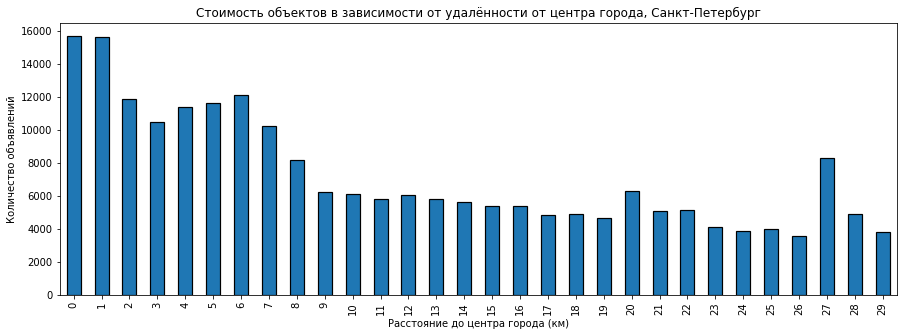

In [76]:
# выделим квартиры в Санкт-Петербурге
st_petersburg_data = data[data['locality_name'] == "Санкт-Петербург"]


# вычислим среднюю цену каждого километра
fig = plt.figure(figsize=(15, 5))
st_petersburg_data.groupby('city_center_km')['last_price'].mean()
st_petersburg_data.groupby('city_center_km')['last_price'].mean().plot(y = "last_price", style = 'o', \
                                                                       kind = 'bar', edgecolor='black', linewidth=1.2)
plt.title('Стоимость объектов в зависимости от удалённости от центра города, Санкт-Петербург')
plt.xlabel('Расстояние до центра города (км)')
plt.ylabel('Количество объявлений')
plt.show()

**Вывод**

К центру города можно отнести квартиры, расположенные не дальше 7-8 км от центра, в пределах этого интервала, чем ближе к центру находится квартира, тем дорожее её стоимость за квадратный метр. Рост стоимости квартир на расстоянии в 27-30 км от центра можно объяснить большим спросом на жильё в пригороде Санкт-Петербурга - микрорайонах Колпино, Кудрово, Мурино, Пушкин и прочих. 

<div class="alert alert-success">
<b>Комментарий ревьюера: ✅</b>
    

График можно сделать пошире, чтобы сделать его читабельнее.
    
</div>

<div class="alert alert-info"> <b>Комментарий студента: ℹ️</b> Сделано</div>

<div class="alert alert-success">
<b>Комментарий ревьюера (2): ✅</b>

🔥
    
</div>

### Общий вывод

На основе анализа данных о корреляции и графиков, мы можем произвести выводы о влиянии различных факторов на конечную цену недвижимости. Определим какие факторы имеют наибольшее влияние.

- самое большое влияние на стоимость квартир имеет её размер и удаленность от центра города
- увеличение количества комнат влияет на увеличение цены, если их кол-во не превышает 3 комнаты, важнее их просторность, чем кол-во
- квартиры на первом и последнем этажах в среднем стоят меньше, чем квартиры на других этажах
- дороже всего квадратный метр в Санкт-Петербурге из топ-10 городов по кол-ву объявлений, а дешевле - в Выборге
- с большой вероятностью квартира будет продана в течение 73 дней с даты публикации.

<div class="alert alert-success">
<b>Комментарий ревьюера: ✅</b>

Выводы понятны и логичны, а самое главное подкреплены выявленными фактами.
       
В целом сам проект выполнен на хорошем уровне! На протяжении всей работы чувствуется глубина проработки задачи и это безусловный плюс для нас. Было использовано большое количество методов, которые будут помогать тебе в дальнейших проектах.
    
    
**[общий комментарий]** Ячейки **markdown** в том числе мы можем использовать как дополнительный способ стилизации нашего проекта. Оставил ниже ссылку, с примерами стилизации.

https://sqlbak.com/blog/jupyter-notebook-markdown-cheatsheet
    
</div>

<div class="alert alert-info"> <b>Комментарий студента: ℹ️</b> Спасибо за шпаргалку по Markdown, впереди ещё много проектов, думаю она мне пригодится. </div>

<div class="alert alert-success">
<b>Комментарий ревьюера: ✅</b>
    

Возвращаю проект обратно, чтобы убедиться что все мои комментарии понятны.
    
Если вдруг у тебя возникнут какие-то вопросы, то я с радостью отвечу на них 😊
    
</div>

<div class="alert alert-success">
<b>Комментарий ревьюера (2): ✅</b>

Рад, что в целом все понятно и особенно здорово, что сразу стараешься применить на практике новые знания, ведь так они гораздо быстрее усвоятся. Тогда предлагаю двигаться дальше.
    
Поздравляю с успешным завершением проекта 😊👍
    
И желаю успехов в новых работах 😊
    
    
    
</div>

**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод `info()`, гистограммы и т.д.)
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения там, где это возможно
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  устранены неявные дубликаты в названиях населённых пунктов
- [x]  устранены редкие и выбивающиеся значения (аномалии) во всех столбцах
- [x]  посчитано и добавлено в таблицу: цена одного квадратного метра
- [x]  посчитано и добавлено в таблицу: день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
- [x]  посчитано и добавлено в таблицу: месяц публикации объявления
- [x]  посчитано и добавлено в таблицу: год публикации объявления
- [x]  посчитано и добавлено в таблицу: тип этажа квартиры (значения — «первый», «последний», «другой»)
- [x]  посчитано и добавлено в таблицу: расстояние в км до центра города
- [x]  изучены и описаны следующие параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - этаж квартиры;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего аэропорта;
        - расстояние до ближайшего парка;
        - день и месяц публикации объявления
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.
    - Постройте гистограмму.
    - Посчитайте среднее и медиану.
    - В ячейке типа markdown опишите, сколько обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?"
- [x]  выполнено задание: "Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы."
        - общей площади;
        - жилой площади;
        - площади кухни;
        - количество комнат;
        - типа этажа, на котором расположена квартира (первый, последний, другой);
        - даты размещения (день недели, месяц, год);
- [x]  выполнено задание: "Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце `locality_name`."
- [x]  выполнено задание: "Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города."
- [x]  в каждом этапе есть промежуточные выводы
- [x]  есть общий вывод